# Combatting Global Terrorist Networks and Hostile Areas of Concern
## Using Predictive Analysis and Agent-based Modeling to Determine Areas of Possible Hostile Threat and Direct Military Deployment

### Introduction and Explaination of project
Since the terrorist attack on the United States of America on September 11, 2001, the number of global attacks conducted by a terrorist group
or network has risen from under 2000 incidents per year to roughly 14,000 incidents in the year 2016 alone.[$^1$](https://ourworldindata.org/terrorism)
As a result, global militaries have increased planning, budgeting, intelligence gathering, and troop deployments to combat the ever growing threat. 
However, with humans being prone to error or a narrowed focus on a specific objective, larger trends and responses to specific strategies are
left unknown or neglected in order to accomplish the set task.

It costs \$2,100,000 each year to deploy 1 US soldier to Afghanistan.[$^2$](https://www.yahoo.com/news/it-costs--2-1-million-per-year-for-each-soldier-deployed-in-afghanistan--report-133150602.html)
If the soldier must constantly be redeployed to a new base within the country, the amount rises even further. What if there was a way to
accurately predict which region of a given country or area was most prone to carry out hostile actions that would require a military presence?
The soldier could then be more effectively placed to either respond to such aggresion, or possibly defuse the event entirely. With the correct
data and the right model, we can even take this question a step further. What if the deployed soldier's presence, while able to defuse a hostile
intent in the specific region, in fact caused a larger hostile response from the terrorist network? For example, while the minor riot in a small
village (20-30 members) may have been quelled, the terror network responds with a suicide bombing upon a military base. Or the reverse, if the 
soldier is deployed in the neighboring region instead, would the effect of the military presence radiate to the area of concern, quelling the possible
hostile action without the aggressive response?

For my capstone project at Thinkful, I intend to use machine learning and agent-based modeling to accurately predict an area of concern in
a given region, the likelyhood of a hostile action being taken, and the most effect deployment of US troops. In order to accompish this, though,
I must first be able to structure a virtual terrorist network with accurate characteristics, including the range of hostility toward
US troops, religious background and adherence, ranking structure within the network, average number of members of the network within a given population
size, response to proximity of US troops, and others. While some of this data may not be possible to obtain, much of this data can be obtained through
declassfied military and government documents or third-party watchgroups and organizations.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
df = pd.read_csv('C://duh/Thinkful/attributes.csv')

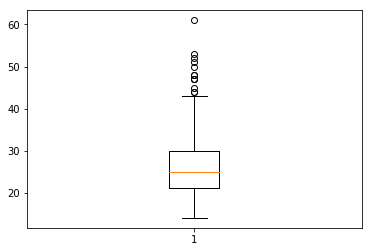

In [2]:
plt.boxplot(df['AgeJoin'].dropna())
plt.show()

In [3]:
df['AgeJoin'].dropna().mean()

26.24802110817942

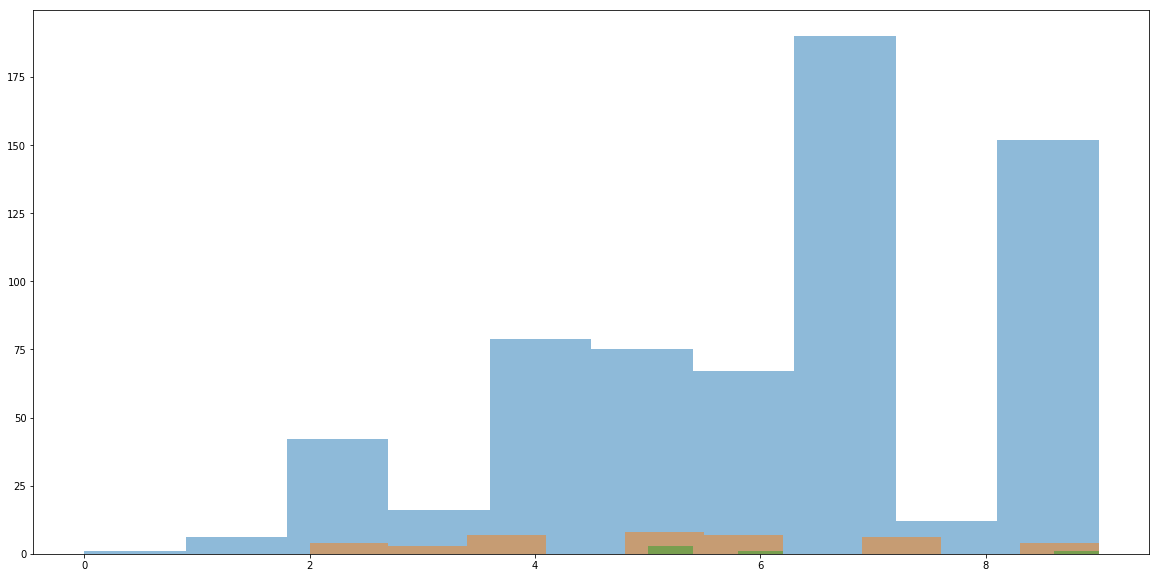

In [4]:
plt.figure(figsize=(20,10))
plt.hist(df['Pos'].dropna(), bins=10, alpha=.5)
plt.hist(df['PosII'].dropna(), bins=10, alpha=.5)
plt.hist(df['PosIII'].dropna(), bins=10, alpha=.5)
plt.show()

In [5]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count10 = 0
count11 = 0
count12 = 0
count13 = 0
for item in df['Op1Role1'].dropna():
    if item == 1:
        count1 += 1
    elif item == 2:
        count2 += 1
    elif item == 3:
        count3 += 1
    elif item == 4:
        count4 += 1
    elif item == 5:
        count5 += 1
    elif item == 6:
        count6 += 1
    elif item == 7:
        count7 += 1
    elif item == 8:
        count8 += 1
    elif item == 9:
        count9 += 1
    elif item == 10:
        count10 += 1
    elif item == 11:
        count11 += 1
    elif item == 12:
        count12 += 1
    elif item == 13:
        count13 += 1
plt_roles = [count1, count2, count3, count4, count5, count6, count7, count8, count9, count10, count11, count12, count13]

In [6]:
plt_labels = ['Sympathizer', 'Foot Soldier', 'Recruiter', 'Financer', 'Logistician', 'Emir', 'Ideologue', 'Bomber',
              'Bomb Fabrication', 'Weapons Purveyor', 'Weapons Acquisition', 'Trainer', 'Unknown']

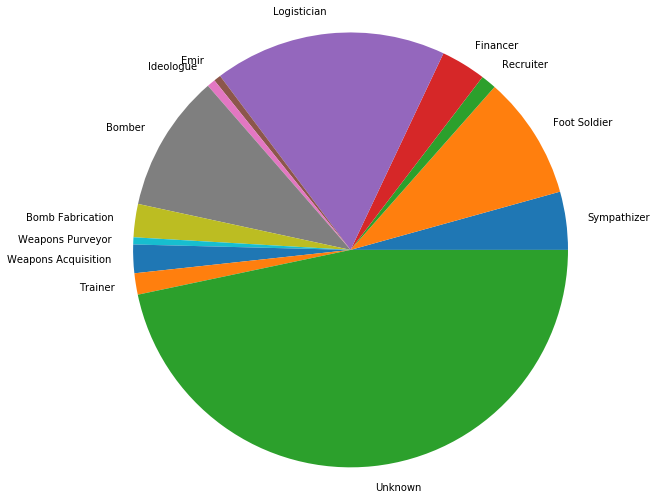

In [7]:
plt.pie(plt_roles, labels=plt_labels, radius=2.5)
plt.show()

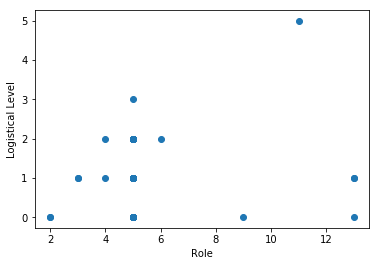

In [8]:
plt.scatter(df['Op1Role1'], df['LogLev1'])
plt.xlabel('Role')
plt.ylabel('Logistical Level')
plt.show()

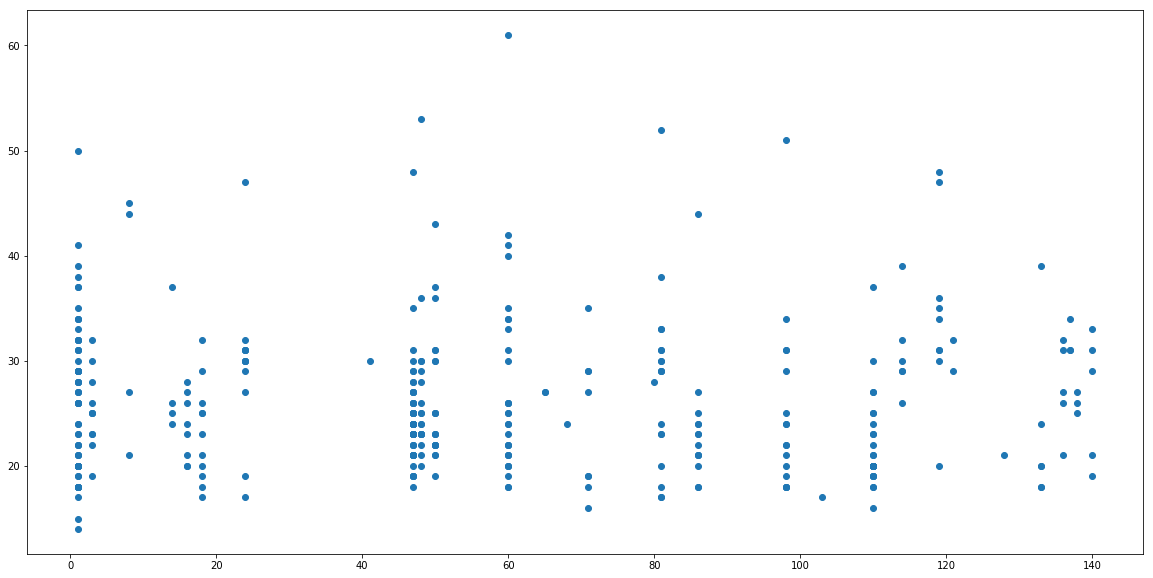

In [25]:
plt.figure(figsize=(20,10))
plt.scatter(df['Cjoin'], df['AgeJoin'])
plt.show()

In [42]:
df['Cjoin'].value_counts()

60.0     82
1.0      69
47.0     53
114.0    37
110.0    31
86.0     22
50.0     22
48.0     21
81.0     21
98.0     17
24.0     14
119.0    14
18.0     12
3.0      11
133.0     9
136.0     9
16.0      8
71.0      8
8.0       5
140.0     5
137.0     4
14.0      4
138.0     3
103.0     2
65.0      2
121.0     2
80.0      1
128.0     1
41.0      1
68.0      1
62.0      1
Name: Cjoin, dtype: int64